In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [143]:
from sklearn.metrics import plot_roc_curve, recall_score

In [5]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,precision_score,f1_score,roc_auc_score,classification_report,confusion_matrix

In [6]:
df= pd.read_csv("heart_2020.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.shape

(319795, 18)

In [9]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
df.duplicated().sum()

18078

In [11]:
df.drop_duplicates(keep= 'first' , inplace= True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(301717, 18)

In [14]:
df["Diabetic"].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [15]:
#replacing "No, borderline diabetes" with "No" and "Yes (during pregnancy)"" with "Yes"

df["Diabetic"].replace({"No, borderline diabetes": "No","Yes (during pregnancy)": "Yes" }, inplace=True)

In [16]:
df["Diabetic"].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

In [17]:
df.shape

(301717, 18)

In [18]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [19]:
num_cols= ["BMI", "PhysicalHealth", 'MentalHealth', 'SleepTime']

In [20]:
len(num_cols)

4

In [21]:
cat_cols= ['Smoking', 'AlcoholDrinking', 'Stroke',
         'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
       'Asthma', 'KidneyDisease', 'SkinCancer']

In [22]:
len(cat_cols)

13

In [23]:
# Checking no: of sub-categories for each categorical columns
for i in cat_cols:
    print(i,":",df[i].nunique())



Smoking : 2
AlcoholDrinking : 2
Stroke : 2
DiffWalking : 2
Sex : 2
AgeCategory : 13
Race : 6
Diabetic : 2
PhysicalActivity : 2
GenHealth : 5
Asthma : 2
KidneyDisease : 2
SkinCancer : 2


### Result: AgeCategory is having the highest number of sub-categories (13)

In [24]:
df["AgeCategory"].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [25]:
# combining sub-categories in Age category

df["AgeCategory"].replace({"18-24": "18-29", "25-29" : "18-29" ,
                         "30-34": "30-39", "35-39": "30-39",
                         "40-44": "40-49", "45-49": "40-49", 
                         "50-54": "50-59", "55-59": "50-59",
                          "60-64": "60-69", "65-69": "60-69", 
                          "70-74": "70-79", "75-79": "70-79"}, inplace=True)

In [26]:
df["AgeCategory"].value_counts()

60-69          62889
50-59          51346
70-79          49986
40-49          40355
30-39          37479
18-29          36310
80 or older    23352
Name: AgeCategory, dtype: int64

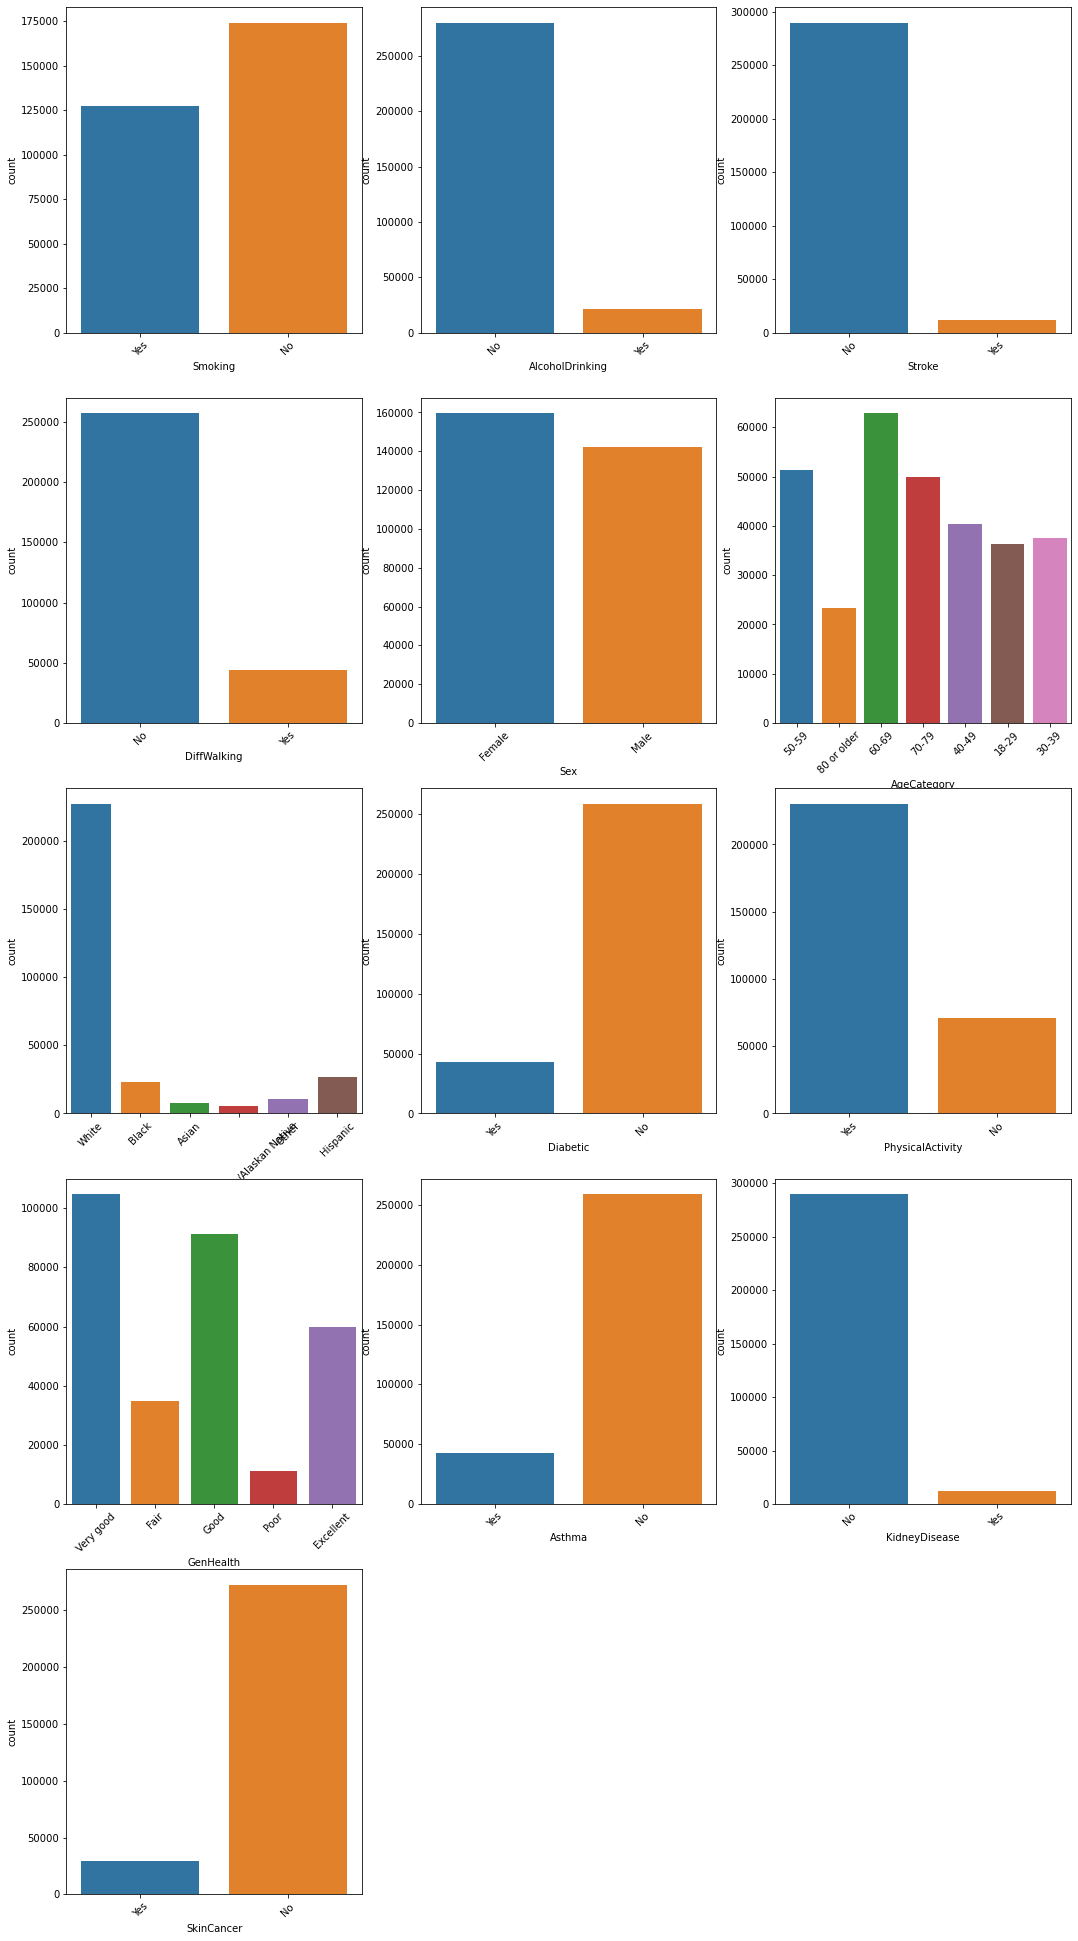

In [27]:
# Countplot for categorical variables

plt.figure(figsize=(18,85))
plot_num=1
for i in cat_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=45)
    plot_num+=1
plt.show()


## Observations: 

- Non-smoking test subjects are slightly more
- Non-Alcohol drinking test subjects are very high
- Test subjects with no stroke are very high
- Test subjects with no difficulty in walking are very high
- White test subjects are dominating in the sample
- Test subjects with no diabetics are dominating
- Test subjects with no asthma are dominating
- Test subjects with no kidney disease are dominating
- Test subjects with no skin cancer are dominating

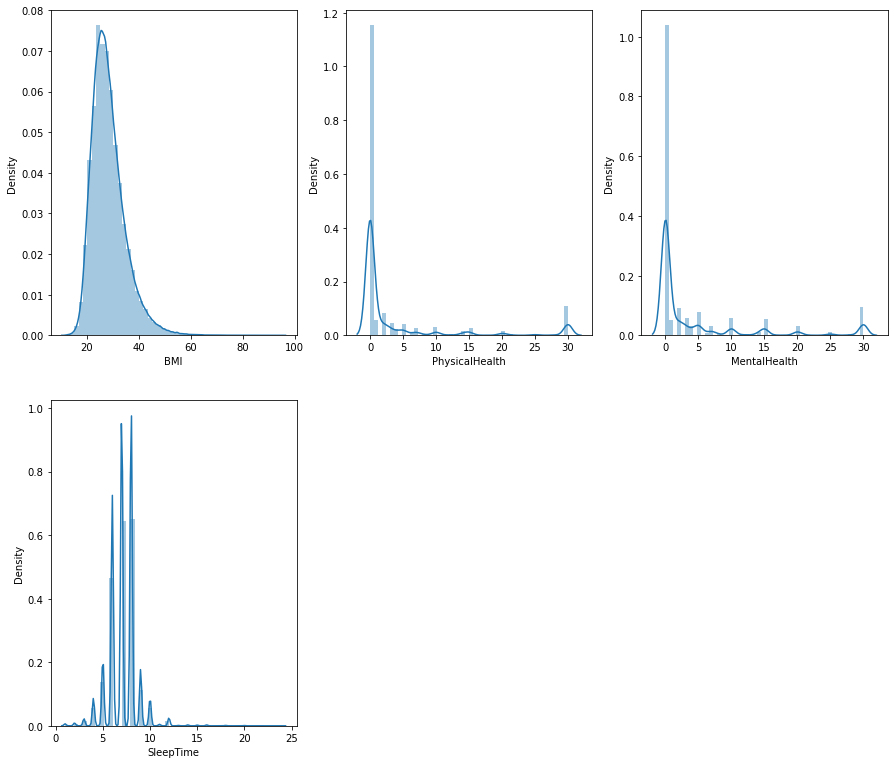

In [28]:
# Distplot for Numerical variables
plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(df[i])
    plot_num+=1
plt.show()


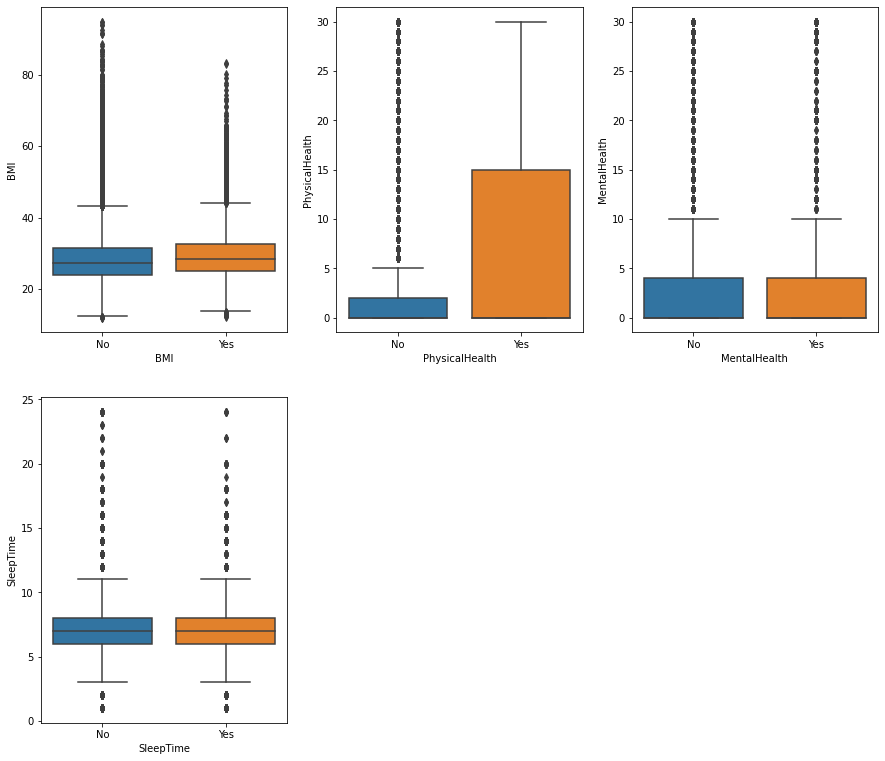

In [29]:
# Plotting boxplot of features with respect to target variable.
plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(x='HeartDisease',y=df[i],data=df)
    plt.xlabel(i)
    plot_num+=1
plt.show()


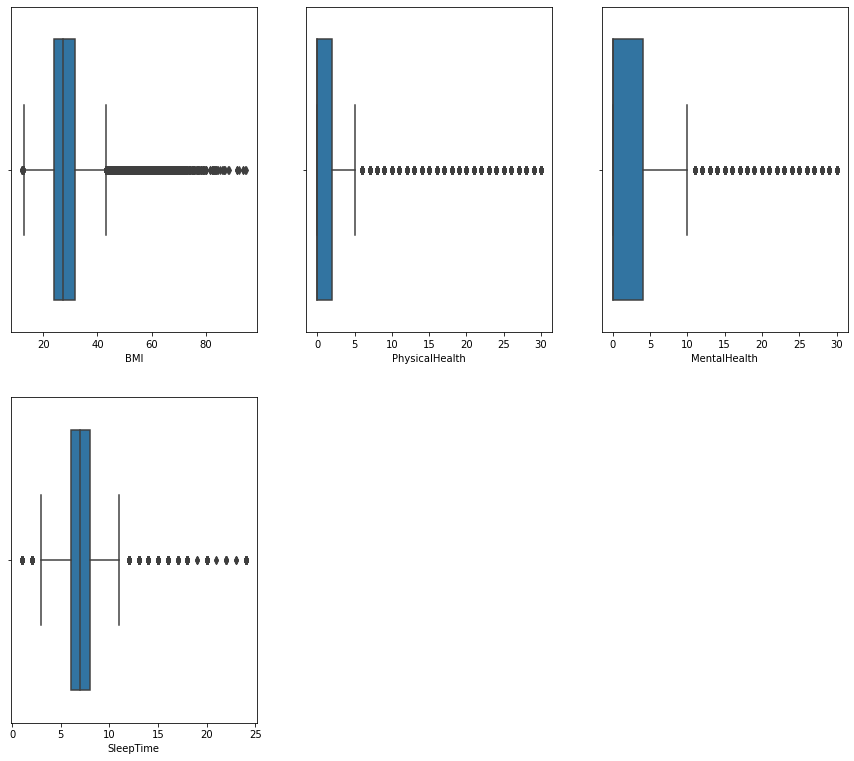

In [30]:
# Boxplot for outliers

plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plot_num+=1
plt.show()



In [31]:
df_num = df[["BMI", "PhysicalHealth", 'MentalHealth', 'SleepTime']]

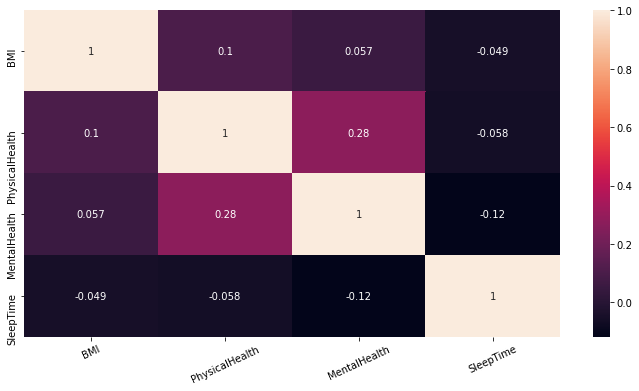

In [32]:
# Plotting heatmap to see the correlation among numerical variables
plt.figure(figsize=(12,6))
sns.heatmap(df_num.corr(),annot=True)
plt.xticks(rotation=25)
plt.show()


## Observations: 

- Positive correlation between Physical Health & Mental Health (0.28)
- Weak negative correlation between Mental Health & Sleep Time (-0.12)

In [33]:
## Plotting Heart Disease (Target) Category

In [34]:
df["HeartDisease"].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [35]:
# Percentage of subjects with Heart Disease

hrt_yes= round((df['HeartDisease'].value_counts()[1]/df.shape[0])*100,2)
hrt_yes

9.04

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

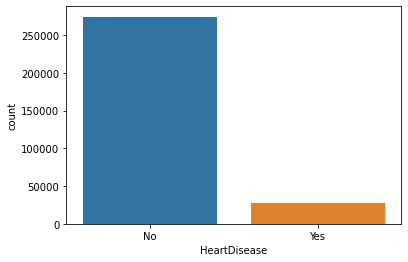

In [36]:
sns.countplot(x="HeartDisease", data=df)

## Result: Heart Disease (Target) is imbalanced

In [37]:
df['HeartDisease'].replace({"Yes":1, "No":0}, inplace= True)

In [38]:
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [39]:
hrt_yes= df[df['HeartDisease']==1]
hrt_yes.shape


(27261, 18)

## Statistical Tests

## 1) Plotting Smoking count plot among heart disease subjects

<AxesSubplot:xlabel='Smoking', ylabel='count'>

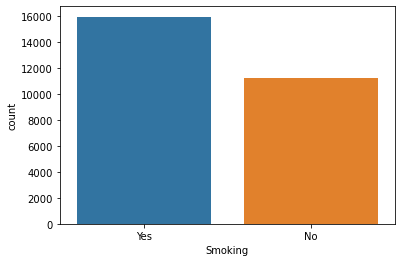

In [40]:
sns.countplot(x="Smoking", data=hrt_yes)

In [41]:
hrt_yes["Smoking"].value_counts()

Yes    15977
No     11284
Name: Smoking, dtype: int64

## From the graph, subjects who smoke are more among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is higher for smoking case

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_Smoking <= 0.5

- H1: Heart Disease Proportion of P_Smoking > 0.5



In [42]:
pd.crosstab(df.Smoking,df.HeartDisease,margins=True)

HeartDisease,0,1,All
Smoking,,,
No,163028,11284,174312
Yes,111428,15977,127405
All,274456,27261,301717


In [43]:
P=0.5
x= 15977
n= 27261

In [44]:
proportions_ztest(x,n,0.5,alternative='larger')

(28.85441631768778, 2.2300018239258836e-183)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of smoking cases is higher than Non smoking

## 2) Plotting Stroke count plot among heart disease subjects

<AxesSubplot:xlabel='Stroke', ylabel='count'>

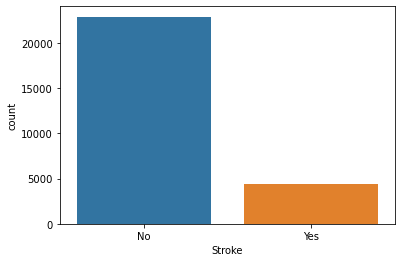

In [45]:
sns.countplot(x="Stroke", data=hrt_yes)

In [46]:
hrt_yes["Stroke"].value_counts(normalize=True)*100

No     83.900077
Yes    16.099923
Name: Stroke, dtype: float64

## From the graph, subjects who had stroke are less among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is lower for stroke cases

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_Stroke >= 0.5

- H1: Heart Disease Proportion of P_Stroke < 0.5



In [47]:
pd.crosstab(df.Stroke,df.HeartDisease,margins=True)

HeartDisease,0,1,All
Stroke,,,
No,266781,22872,289653
Yes,7675,4389,12064
All,274456,27261,301717


In [48]:
P=0.5
x= 4389
n= 27261

In [49]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-152.29249355529922, 0.0)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of stroke cases is lower 

## 3) Plotting DiffWalking count plot among heart disease subjects

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

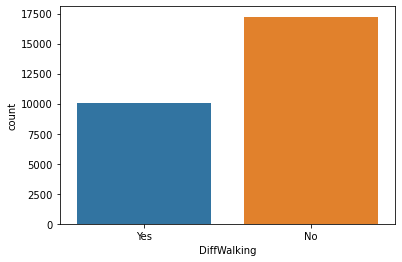

In [50]:
sns.countplot(x="DiffWalking", data=hrt_yes)

In [51]:
hrt_yes["DiffWalking"].value_counts(normalize=True)*100

No     63.229522
Yes    36.770478
Name: DiffWalking, dtype: float64

## From the graph, subjects who had DiffWalking are less among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is lower for DiffWalking cases

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_DiffWalking >= 0.5

- H1: Heart Disease Proportion of P_DiffWalking < 0.5



In [52]:
pd.crosstab(df.DiffWalking,df.HeartDisease,margins=True)

HeartDisease,0,1,All
DiffWalking,,,
No,240125,17237,257362
Yes,34331,10024,44355
All,274456,27261,301717


In [53]:
P=0.5
x= 10024
n= 27261

In [54]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-45.30075686836355, 0.0)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of DiffWalking cases is lower 

## 4) Plotting Gender count plot among heart disease subjects

<AxesSubplot:xlabel='Sex', ylabel='count'>

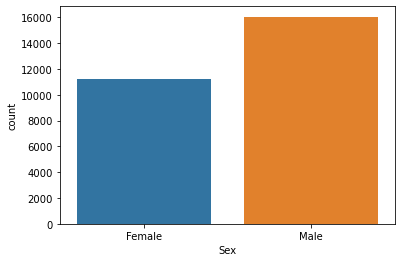

In [55]:
sns.countplot(x="Sex", data=hrt_yes)

In [56]:
hrt_yes["Sex"].value_counts(normalize=True)*100

Male      58.86798
Female    41.13202
Name: Sex, dtype: float64

## From the graph, female subjects are less among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is lower for female case

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_female >= 0.5

- H1: Heart Disease Proportion of P_female < 0.5



In [57]:
pd.crosstab(df.Sex,df.HeartDisease,margins=True)

HeartDisease,0,1,All
Sex,,,
Female,148458,11213,159671
Male,125998,16048,142046
All,274456,27261,301717


In [58]:
P=0.5
x= 11213
n= 27261

In [59]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-29.755414551959824, 7.379232404310079e-195)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of Female cases is lower 

## 5) Plotting Diabetic count plot among heart disease subjects

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

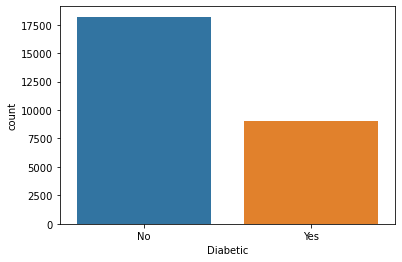

In [60]:
sns.countplot(x="Diabetic", data=hrt_yes)

In [61]:
hrt_yes["Diabetic"].value_counts(normalize=True)*100

No     66.780382
Yes    33.219618
Name: Diabetic, dtype: float64

## From the graph, Diabetic subjects are less among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is lower for diabetic cases

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_diabetic >= 0.5

- H1: Heart Disease Proportion of P_diabetic < 0.5



In [62]:
pd.crosstab(df.Diabetic,df.HeartDisease,margins=True)

HeartDisease,0,1,All
Diabetic,,,
No,240367,18205,258572
Yes,34089,9056,43145
All,274456,27261,301717


In [63]:
P=0.5
x= 9056
n= 27261

In [64]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-58.82351534406924, 0.0)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of Diabetic cases is lower 

## 6) Plotting Physical Activity count plot among heart disease subjects

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

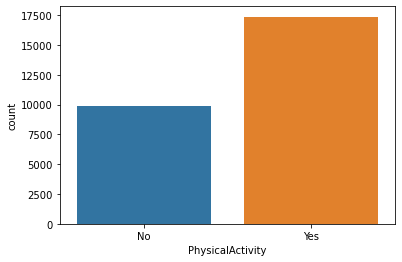

In [65]:
sns.countplot(x="PhysicalActivity", data=hrt_yes)

In [66]:
hrt_yes["PhysicalActivity"].value_counts(normalize=True)*100

Yes    63.750413
No     36.249587
Name: PhysicalActivity, dtype: float64

## From the graph, no PhysicalActivity are less among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is higher for  PhysicalActivity

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_PhysicalActivity <= 0.5

- H1: Heart Disease Proportion of P_PhysicalActivity > 0.5



In [67]:
pd.crosstab(df.PhysicalActivity,df.HeartDisease,margins=True)

HeartDisease,0,1,All
PhysicalActivity,,,
No,61423,9882,71305
Yes,213033,17379,230412
All,274456,27261,301717


In [68]:
P=0.5
x= 17379
n= 27261

In [69]:
proportions_ztest(x,n,0.5,alternative='larger')

(47.22735139846868, 0.0)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of PhysicalActivity cases is higher

## 7) Plotting Asthma count plot among heart disease subjects

<AxesSubplot:xlabel='Asthma', ylabel='count'>

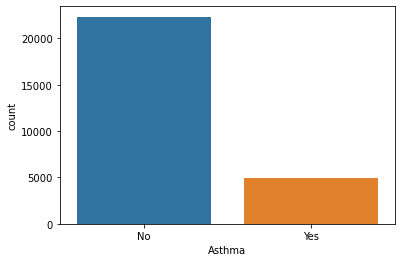

In [70]:
sns.countplot(x="Asthma", data=hrt_yes)

In [71]:
hrt_yes["Asthma"].value_counts(normalize=True)*100

No     81.908221
Yes    18.091779
Name: Asthma, dtype: float64

## From the graph, Asthma cases are less among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is lower for Asthma cases

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_Asthma >= 0.5

- H1: Heart Disease Proportion of P_Asthma < 0.5



In [72]:
pd.crosstab(df.Asthma,df.HeartDisease,margins=True)

HeartDisease,0,1,All
Asthma,,,
No,236737,22329,259066
Yes,37719,4932,42651
All,274456,27261,301717


In [73]:
P=0.5
x= 4932
n= 27261

In [74]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-136.85765314290603, 0.0)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of Asthma cases is lower

## 8) Plotting KidneyDisease count plot among heart disease subjects

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

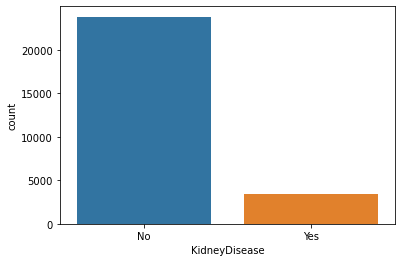

In [75]:
sns.countplot(x="KidneyDisease", data=hrt_yes)

In [76]:
hrt_yes["KidneyDisease"].value_counts(normalize=True)*100

No     87.329885
Yes    12.670115
Name: KidneyDisease, dtype: float64

## From the graph, KidneyDisease cases are less among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is lower for KidneyDisease cases

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_KidneyDisease >= 0.5

- H1: Heart Disease Proportion of P_KidneyDisease < 0.5



In [77]:
pd.crosstab(df.KidneyDisease,df.HeartDisease,margins=True)

HeartDisease,0,1,All
KidneyDisease,,,
No,266134,23807,289941
Yes,8322,3454,11776
All,274456,27261,301717


In [78]:
P=0.5
x= 3454
n= 27261

In [79]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-185.29164021208538, 0.0)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of KidneyDisease cases is lower

## 9) Plotting SkinCancer count plot among heart disease subjects

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

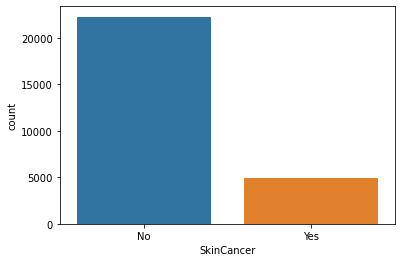

In [80]:
sns.countplot(x="SkinCancer", data=hrt_yes)

In [81]:
hrt_yes["SkinCancer"].value_counts(normalize=True)*100

No     81.776164
Yes    18.223836
Name: SkinCancer, dtype: float64

## From the graph, SkinCancer cases are less among heart disease cases

## Hypothesis Test

- Test whether the heart disease proportion is lower for SkinCancer cases

## One Sample Test of proportion @ 5% significance level

- H0: Heart Disease Proportion of P_SkinCancer >= 0.5

- H1: Heart Disease Proportion of P_SkinCancer < 0.5



In [82]:
pd.crosstab(df.SkinCancer,df.HeartDisease,margins=True)

HeartDisease,0,1,All
SkinCancer,,,
No,250132,22293,272425
Yes,24324,4968,29292
All,274456,27261,301717


In [83]:
P=0.5
x= 4968
n= 27261

In [84]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-135.90614299595887, 0.0)

## Since p value < alpha(0.05) --> reject H0
## We can conclude that Heart Disease proportion of SkinCancer cases is lower

## 10) Plotting Race count plot among heart disease subjects

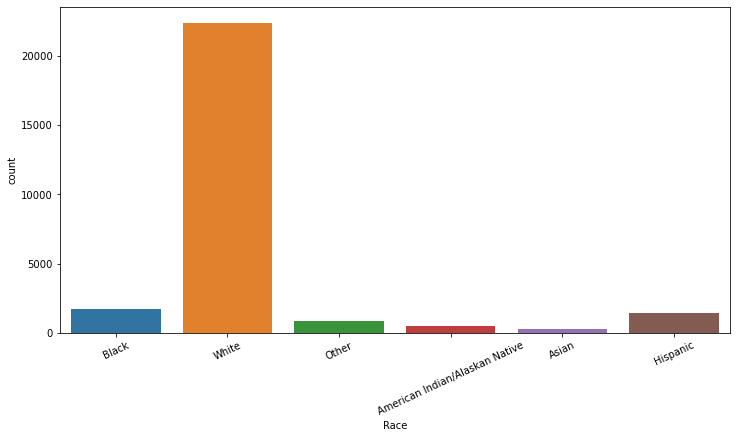

In [85]:
plt.figure(figsize= (12,6))
sns.countplot(x="Race", data=hrt_yes)
plt.xticks(rotation= 25)
plt.show()

## From the graph, white race subjects are more among heart disease cases

## Hypothesis Test

## Chi Square test

- H0: There is no association b/w Race & Heart Disease

- H1: There is an association b/w Race & Heart Disease



In [86]:
pd.crosstab(df.Race,df.HeartDisease,margins=True)

HeartDisease,0,1,All
Race,,,
American Indian/Alaskan Native,4650,542,5192
Asian,7727,266,7993
Black,21081,1729,22810
Hispanic,25664,1443,27107
Other,10005,886,10891
White,205329,22395,227724
All,274456,27261,301717


In [87]:
table=pd.crosstab(df.Race,df.HeartDisease,margins=True)

In [88]:
st.chi2_contingency(table)

(1030.0583806467882,
 6.454626186921883e-213,
 12,
 array([[  4722.88784523,    469.11215477,   5192.        ],
        [  7270.80942738,    722.19057262,   7993.        ],
        [ 20749.05079926,   2060.94920074,  22810.        ],
        [ 24657.8044724 ,   2449.1955276 ,  27107.        ],
        [  9906.96678013,    984.03321987,  10891.        ],
        [207148.4806756 ,  20575.5193244 , 227724.        ],
        [274456.        ,  27261.        , 301717.        ]]))

### Since p value < alpha(0.05) --> reject H0
### We can conclude that there is association between Race & Heart Disease

## 11) Plotting Age category count plot among heart disease subjects

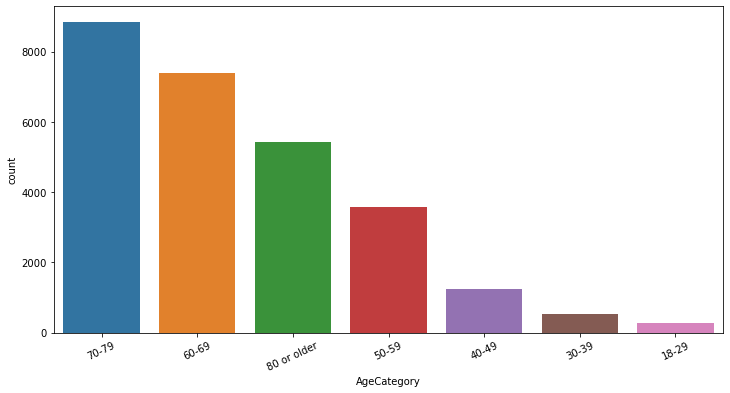

In [89]:
plt.figure(figsize= (12,6))
sns.countplot(x="AgeCategory", data=hrt_yes)
plt.xticks(rotation= 25)
plt.show()

## From the graph, 70-79 age group subjects are more among heart disease cases

## Hypothesis Test

## Chi Square test

- H0: There is no association b/w Age group & Heart Disease

- H1: There is an association b/w Age group & Heart Disease



In [90]:
pd.crosstab(df.AgeCategory,df.HeartDisease,margins=True)

HeartDisease,0,1,All
AgeCategory,,,
18-29,36047,263,36310
30-39,36957,522,37479
40-49,39126,1229,40355
50-59,47764,3582,51346
60-69,55494,7395,62889
70-79,41142,8844,49986
80 or older,17926,5426,23352
All,274456,27261,301717


In [91]:
table=pd.crosstab(df.AgeCategory,df.HeartDisease,margins=True)

In [92]:
st.chi2_contingency(table)

(18597.079288895162,
 0.0,
 14,
 array([[ 33029.28691456,   3280.71308544,  36310.        ],
        [ 34092.66439743,   3386.33560257,  37479.        ],
        [ 36708.80951355,   3646.19048645,  40355.        ],
        [ 46706.74100564,   4639.25899436,  51346.        ],
        [ 57206.79770779,   5682.20229221,  62889.        ],
        [ 45469.62092292,   4516.37907708,  49986.        ],
        [ 21242.07953811,   2109.92046189,  23352.        ],
        [274456.        ,  27261.        , 301717.        ]]))

### Since p value < alpha(0.05) --> reject H0
### We can conclude that there is association between AgeCategory & Heart Disease

## 12) Testing whether BMI is different among Heart Disease and Non-Heart disease cases

In [93]:
bmi_yes = df[df["HeartDisease"]==1]["BMI"]
bmi_no = df[df["HeartDisease"]==0]["BMI"]

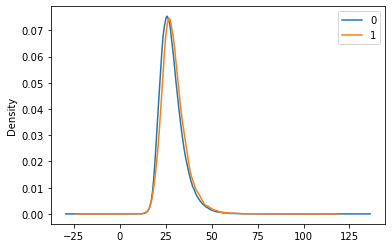

In [94]:
df.groupby('HeartDisease')['BMI'].plot.density(legend=True);

In [95]:
df.groupby('HeartDisease')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,274456.0,28.345630,6.448337,12.02,23.87,27.34,31.57,94.85
1,27261.0,29.411893,6.586240,12.21,25.06,28.34,32.69,83.33


In [96]:
# Test of Normality for both Heart disease BMI & Non-Heart Disease BMI

In [97]:
st.shapiro(bmi_yes)

ShapiroResult(statistic=0.9373605251312256, pvalue=0.0)

In [98]:
st.shapiro(bmi_no)

ShapiroResult(statistic=0.9294950366020203, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

## Hence we proceed for non parametric test

## Mann Whitney U test

- Ho: pop median_bmi_yes <= pop median_bmi_no

- H1: pop median_bmi_yes > pop median_bmi_no


In [99]:
st.mannwhitneyu(bmi_yes,bmi_no,alternative='greater')

MannwhitneyuResult(statistic=4145450439.0, pvalue=1.9152506330346993e-191)

## Since p value < alpha(0.05) --> reject H0;
## Hence we can conclude that the bmi median for heart disease is greater than non-heart disease

<AxesSubplot:xlabel='HeartDisease'>

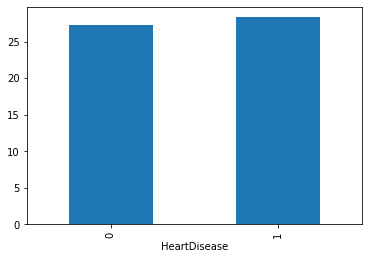

In [100]:
df.groupby('HeartDisease')['BMI'].median().plot(kind= "bar")

## 13) Testing whether Physical Health is different among Heart Disease and Non-Heart disease cases

In [101]:
phealth_yes = df[df["HeartDisease"]==1]["PhysicalHealth"]
phealth_no = df[df["HeartDisease"]==0]["PhysicalHealth"]

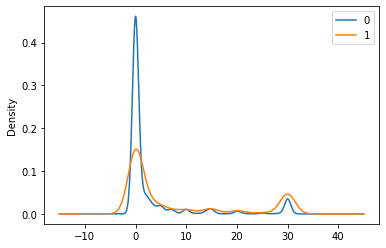

In [102]:
df.groupby('HeartDisease')['PhysicalHealth'].plot.density(legend=True);

In [103]:
df.groupby('HeartDisease')['PhysicalHealth'].median()

HeartDisease
0    0.0
1    0.0
Name: PhysicalHealth, dtype: float64

In [104]:
df.groupby('HeartDisease')['PhysicalHealth'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,274456.0,3.148366,7.597830,0.0,0.0,0.0,2.0,30.0
1,27261.0,7.840321,11.500464,0.0,0.0,0.0,15.0,30.0


In [105]:
# Test of Normality for both Heart disease PhysicalHealth & Non-Heart Disease PhysicalHealth

In [106]:
st.shapiro(phealth_yes)

ShapiroResult(statistic=0.6728900671005249, pvalue=0.0)

In [107]:
st.shapiro(phealth_no)

ShapiroResult(statistic=0.46732836961746216, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution



In [108]:
df.groupby('HeartDisease')['PhysicalHealth'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,274456.0,3.148366,7.597830,0.0,0.0,0.0,2.0,30.0
1,27261.0,7.840321,11.500464,0.0,0.0,0.0,15.0,30.0


### Since medians for both populations are same (zero) Mann Whitney U test is useless

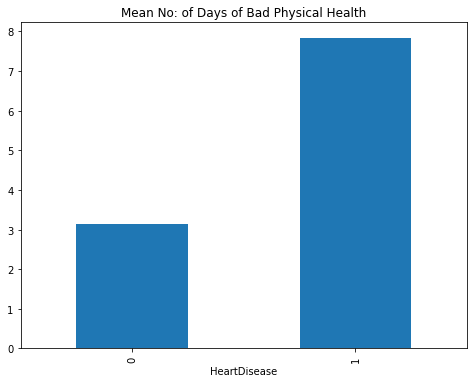

In [109]:
plt.figure(figsize=(8,6))
df.groupby('HeartDisease')['PhysicalHealth'].mean().plot(kind= "bar")
plt.title("Mean No: of Days of Bad Physical Health")
plt.show()

### Result: Mean number of days where the subject's physical health was not good is greater for Heart Disease cases compared to Non-Heart disease cases

## 14) Testing whether Mental Health is different among Heart Disease and Non-Heart disease cases

In [110]:
mhealth_yes = df[df["HeartDisease"]==1]["MentalHealth"]
mhealth_no = df[df["HeartDisease"]==0]["MentalHealth"]

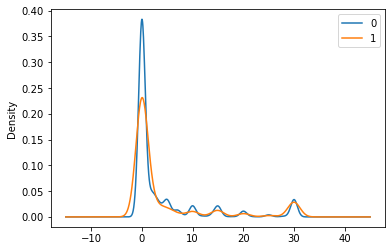

In [111]:
df.groupby('HeartDisease')['MentalHealth'].plot.density(legend=True);

In [112]:
df.groupby('HeartDisease')['MentalHealth'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,274456.0,4.067902,8.013658,0.0,0.0,0.0,4.0,30.0
1,27261.0,4.660834,9.185917,0.0,0.0,0.0,4.0,30.0


In [113]:
# Test of Normality for both Heart disease BMI & Non-Heart Disease BMI

In [114]:
st.shapiro(mhealth_yes)

ShapiroResult(statistic=0.5593920946121216, pvalue=0.0)

In [115]:
st.shapiro(mhealth_no)

ShapiroResult(statistic=0.5683465003967285, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution


In [116]:
df.groupby('HeartDisease')['MentalHealth'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,274456.0,4.067902,8.013658,0.0,0.0,0.0,4.0,30.0
1,27261.0,4.660834,9.185917,0.0,0.0,0.0,4.0,30.0


### Since medians for both populations are same (zero) Mann Whitney U test is useless

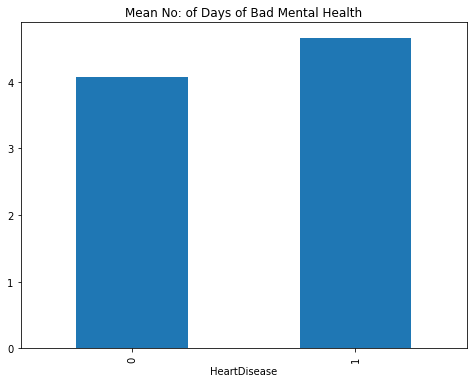

In [117]:
plt.figure(figsize=(8,6))
df.groupby('HeartDisease')['MentalHealth'].mean().plot(kind= "bar")
plt.title("Mean No: of Days of Bad Mental Health")
plt.show()

### Result: Mean number of days where the subject's mental health was not good is slightly greater for Heart Disease cases compared to Non-Heart disease cases

## 15) Testing whether SleepTime is different among Heart Disease and Non-Heart disease cases

In [118]:
sleep_yes = df[df["HeartDisease"]==1]["SleepTime"]
sleep_no = df[df["HeartDisease"]==0]["SleepTime"]

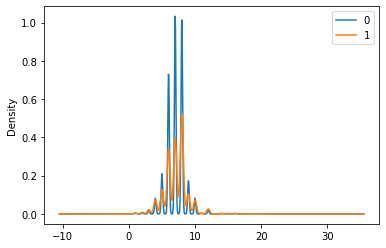

In [119]:
df.groupby('HeartDisease')['SleepTime'].plot.density(legend=True);

In [120]:
df.groupby('HeartDisease')['SleepTime'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,274456.0,7.079550,1.431746,1.0,6.0,7.0,8.0,24.0
1,27261.0,7.134991,1.783877,1.0,6.0,7.0,8.0,24.0


In [121]:
# Test of Normality for both Heart disease SleepTime & Non-Heart Disease SleepTime

In [122]:
st.shapiro(sleep_yes)

ShapiroResult(statistic=0.9071798920631409, pvalue=0.0)

In [123]:
st.shapiro(sleep_no)

ShapiroResult(statistic=0.8922908306121826, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

## Hence we proceed for non parametric test

## Mann Whitney U test

- Ho: pop median_sleep_yes <= pop median_sleep_no

- H1: pop median_sleep_yes > pop median_sleep_no


In [124]:
st.mannwhitneyu(sleep_yes,sleep_no,alternative='greater')

MannwhitneyuResult(statistic=3817176624.0, pvalue=4.737278627623607e-09)

## Since p value < alpha(0.05) --> reject H0;
## Hence we can conclude that the sleep time median for heart disease is greater than non-heart disease

In [244]:
df.to_excel("heart_capstone.xlsx")

In [125]:
ht= df.copy()

In [126]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [127]:
X= ht.drop("HeartDisease", axis=1)

In [128]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,50-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,60-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,70-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-49,White,No,Yes,Very good,8.0,No,No,No


In [129]:
X.shape

(301717, 17)

In [130]:
y = ht["HeartDisease"]

In [131]:
# Encoding

X = pd.get_dummies(X,drop_first=True)
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_30-39,...,Race_White,Diabetic_Yes,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,1,0,0,0,0,0,...,1,1,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,1,0,0,0,1,0,...,1,1,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0


In [132]:
#Scaling 

sc= StandardScaler()

for i in X.columns:
    X[i]= sc.fit_transform(X[i].values.reshape(-1,1))

In [133]:
X.head()


,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_30-39,...,Race_White,Diabetic_Yes,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.830820,-0.070301,3.183766,-1.420852,1.169689,-0.277556,-0.204083,-0.415144,-0.943195,-0.376614,...,0.570021,2.448079,0.556298,-0.360251,-0.658396,-0.197128,1.370799,2.464567,-0.201532,3.049643
1,-1.252600,-0.438823,-0.507054,-0.057636,-0.854928,-0.277556,4.899969,-0.415144,-0.943195,-0.376614,...,0.570021,-0.408483,0.556298,-0.360251,-0.658396,-0.197128,1.370799,-0.405751,-0.201532,-0.327907
2,-0.287869,2.017986,3.183766,0.623971,1.169689,-0.277556,-0.204083,-0.415144,1.060226,-0.376614,...,0.570021,2.448079,0.556298,2.775842,-0.658396,-0.197128,-0.729502,2.464567,-0.201532,-0.327907
3,-0.654281,-0.438823,-0.507054,-0.739244,-0.854928,-0.277556,-0.204083,-0.415144,-0.943195,-0.376614,...,0.570021,-0.408483,-1.797598,-0.360251,1.518844,-0.197128,-0.729502,-0.405751,-0.201532,3.049643
4,-0.731583,3.000709,-0.507054,0.623971,-0.854928,-0.277556,-0.204083,2.408801,-0.943195,-0.376614,...,0.570021,-0.408483,0.556298,-0.360251,-0.658396,-0.197128,1.370799,-0.405751,-0.201532,-0.327907


## Model Building

### 1) Logistic Regression without SMOTE

In [134]:
xtrain,xtest,ytrain,ytest= train_test_split(X,y, test_size=0.2,random_state=10, stratify=y)

In [135]:
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (241373, 29)
xtest shape:  (60344, 29)
ytrain shape:  (241373,)
ytest shape:  (60344,)


In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
log_model= LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [138]:
prob_pred_y1 = log_model.predict_proba(xtest)
prob_pred_y1

array([[0.66849494, 0.33150506],
       [0.95799834, 0.04200166],
       [0.8489311 , 0.1510689 ],
       ...,
       [0.95467806, 0.04532194],
       [0.84943275, 0.15056725],
       [0.70969158, 0.29030842]])

In [139]:
pred_y1 = log_model.predict(xtest)
pred_y1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
accuracy_score(ytest,pred_y1)

0.9113913562243139

In [141]:
precision_score(ytest,pred_y1)

0.54911131898971

In [144]:
recall_score(ytest,pred_y1)

0.10766691122523844

In [145]:
f1_score(ytest,pred_y1)


0.1800337371568778

In [146]:
print(classification_report(ytest,pred_y1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54892
           1       0.55      0.11      0.18      5452

    accuracy                           0.91     60344
   macro avg       0.73      0.55      0.57     60344
weighted avg       0.88      0.91      0.88     60344



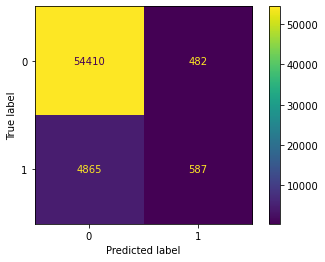

In [147]:
plot_confusion_matrix(log_model, xtest, ytest)

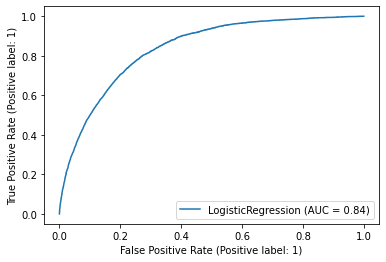

In [148]:
plot_roc_curve(log_model, xtest, ytest)

In [252]:
features = X.columns

In [269]:
#Feature importance
importance1 = log_model.coef_[0]

In [270]:
importance1 

array([ 0.0546289 ,  0.02253109,  0.03631589, -0.02976436,  0.1714576 ,
       -0.07078327,  0.20590473,  0.07370537,  0.35367632,  0.16065014,
        0.38892289,  0.68704773,  0.93267591,  1.03145828,  0.83791171,
       -0.08487426, -0.09209475, -0.08217566, -0.01612747, -0.02377795,
        0.15353391,  0.02052688,  0.46718268,  0.45929287,  0.35509846,
        0.21820206,  0.08975474,  0.1055207 ,  0.02988491])

In [271]:
feature_imp1 = pd.DataFrame({"Variable": features, "Coefficient": importance1 } ).round(decimals=2).sort_values("Coefficient", ascending=False).style.bar(color= ['red', 'green'], align= 'zero')

In [272]:
feature_imp1

,Variable,Coefficient
13,AgeCategory_70-79,1.030000
12,AgeCategory_60-69,0.930000
14,AgeCategory_80 or older,0.840000
11,AgeCategory_50-59,0.690000
22,GenHealth_Fair,0.470000
23,GenHealth_Good,0.460000
10,AgeCategory_40-49,0.390000
24,GenHealth_Poor,0.360000
8,Sex_Male,0.350000
25,GenHealth_Very good,0.220000


### 2) Logistic Regression after SMOTE

In [149]:
from imblearn.over_sampling import SMOTE

In [150]:
sm = SMOTE(random_state=10)

In [151]:
# Before smote
print(f'Count of minority class records before upsampling: {xtrain[ytrain==1].shape[0]}')
print(f'Count of existing Majority class records: {xtrain[ytrain==0].shape[0]}')

Count of minority class records before upsampling: 21809
Count of existing Majority class records: 219564


In [152]:
xtrain_smote, ytrain_smote = sm.fit_resample(xtrain,ytrain)

In [153]:
# After smote
print(f'Count of minority class(class 1) records after SMOTE : {xtrain_smote[ytrain_smote==1].shape[0]}')
print(f'Count of existing Majority class(class 0) records: {xtrain_smote[ytrain_smote==0].shape[0]}')

Count of minority class(class 1) records after SMOTE : 219564
Count of existing Majority class(class 0) records: 219564


In [154]:
ytrain_smote.value_counts()

0    219564
1    219564
Name: HeartDisease, dtype: int64

In [155]:
log_model2= LogisticRegression()
log_model2.fit(xtrain_smote, ytrain_smote)

LogisticRegression()

In [156]:
prob_pred_y2 = log_model2.predict_proba(xtest)
prob_pred_y2

array([[0.15813035, 0.84186965],
       [0.70294244, 0.29705756],
       [0.35509641, 0.64490359],
       ...,
       [0.6998168 , 0.3001832 ],
       [0.34737362, 0.65262638],
       [0.21149059, 0.78850941]])

In [157]:
pred_y2 = log_model2.predict(xtest)
pred_y2

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [158]:
accuracy_score(ytest,pred_y2)

0.740620442794644

In [159]:
recall_score(ytest,pred_y2)

0.7899853264856933

In [160]:
precision_score(ytest,pred_y2)

0.22892526841713617

In [161]:
f1_score(ytest,pred_y2)

0.35498227973295976

In [162]:
print(classification_report(ytest,pred_y2))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     54892
           1       0.23      0.79      0.35      5452

    accuracy                           0.74     60344
   macro avg       0.60      0.76      0.60     60344
weighted avg       0.91      0.74      0.79     60344



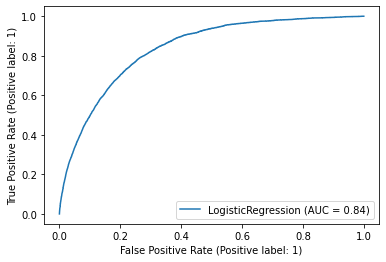

In [163]:
plot_roc_curve(log_model2, xtest, ytest)

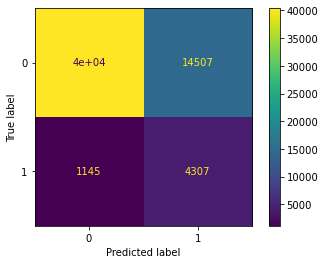

In [164]:
plot_confusion_matrix(log_model2, xtest, ytest)

In [273]:
#Feature importance
importance2 = log_model2.coef_[0]

In [274]:
feature_imp2 = pd.DataFrame({"Variable": features, "Coefficient": importance2 } ).round(decimals=2).sort_values("Coefficient", ascending=False).style.bar(color= ['red', 'green'], align= 'zero')

In [275]:
feature_imp2

,Variable,Coefficient
13,AgeCategory_70-79,1.110000
12,AgeCategory_60-69,1.000000
14,AgeCategory_80 or older,0.910000
11,AgeCategory_50-59,0.740000
22,GenHealth_Fair,0.540000
23,GenHealth_Good,0.520000
10,AgeCategory_40-49,0.410000
8,Sex_Male,0.400000
24,GenHealth_Poor,0.400000
25,GenHealth_Very good,0.260000


### Result: Logistic Regression after SMOTE yields lower False Negatives (hence a better recall_score) which is a better result


## 3) KNN Classifier without SMOTE

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
knn = KNeighborsClassifier()

In [176]:
knn.fit(xtrain,ytrain)
y_pred_knn = knn.predict(xtest)

In [177]:
accuracy_score(ytest,y_pred_knn)

0.9010506429802466

In [178]:
precision_score(ytest,y_pred_knn)

0.37799717912552894

In [179]:
recall_score(ytest,y_pred_knn)

0.1474688187820983

In [180]:
f1_score(ytest,y_pred_knn)


0.21216519329726877

In [181]:
print(classification_report(ytest,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54892
           1       0.38      0.15      0.21      5452

    accuracy                           0.90     60344
   macro avg       0.65      0.56      0.58     60344
weighted avg       0.87      0.90      0.88     60344



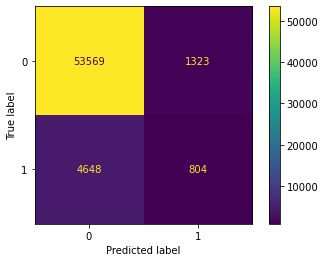

In [182]:
plot_confusion_matrix(knn, xtest, ytest)

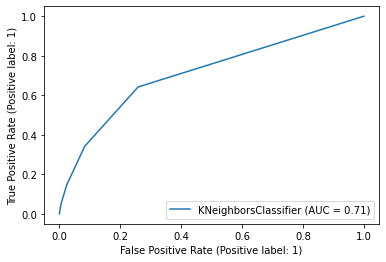

In [183]:
plot_roc_curve(knn, xtest, ytest)

## 4) KNN Classifier after SMOTE

In [184]:
knn2 = KNeighborsClassifier()

In [185]:
knn2.fit(xtrain_smote, ytrain_smote)

KNeighborsClassifier()

In [186]:
y_pred_knn2 = knn2.predict(xtest)

In [187]:
accuracy_score(ytest,y_pred_knn2)

0.7765146493437625

In [188]:
precision_score(ytest,y_pred_knn2)

0.21595248196860417

In [189]:
recall_score(ytest,y_pred_knn2)

0.5601614086573734

In [190]:
f1_score(ytest,y_pred_knn2)


0.3117280800244973

In [191]:
print(classification_report(ytest,y_pred_knn2))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     54892
           1       0.22      0.56      0.31      5452

    accuracy                           0.78     60344
   macro avg       0.58      0.68      0.59     60344
weighted avg       0.88      0.78      0.82     60344



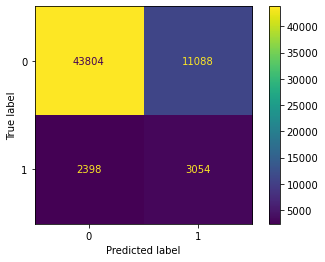

In [192]:
plot_confusion_matrix(knn2, xtest, ytest)

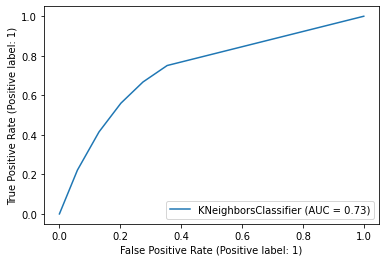

In [193]:
plot_roc_curve(knn2, xtest, ytest)

## Result: KNN Classifier after SMOTE yields lower False Negatives (hence a better recall_score) and a better ROC-AUC Score (0.73 vs 0.71)

## 5) Naive Bayes without SMOTE

In [194]:
from sklearn.naive_bayes import GaussianNB

In [195]:
gnb = GaussianNB()

In [196]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [197]:
y_pred_nb = gnb.predict(xtest)

In [198]:
accuracy_score(ytest,y_pred_nb)

0.8116465597242476

In [199]:
precision_score(ytest,y_pred_nb)

0.2573444936812736

In [200]:
recall_score(ytest,y_pred_nb)

0.5752017608217168

In [201]:
f1_score(ytest,y_pred_nb)


0.3555958725479079

In [202]:
print(classification_report(ytest,y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     54892
           1       0.26      0.58      0.36      5452

    accuracy                           0.81     60344
   macro avg       0.60      0.71      0.62     60344
weighted avg       0.89      0.81      0.84     60344



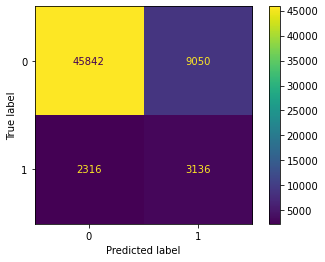

In [203]:
plot_confusion_matrix(gnb, xtest, ytest)

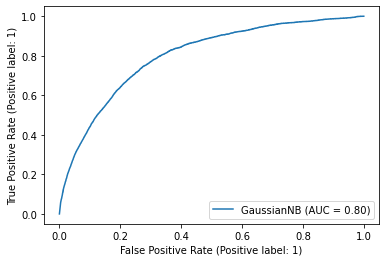

In [204]:
plot_roc_curve(gnb, xtest, ytest)

## 6) Naive Bayes after SMOTE

In [205]:
gnb2 = GaussianNB()

In [206]:
gnb2.fit(xtrain_smote,ytrain_smote)

GaussianNB()

In [207]:
y_pred_nb2 = gnb2.predict(xtest)

In [208]:
accuracy_score(ytest,y_pred_nb2)

0.7454427946440408

In [209]:
precision_score(ytest,y_pred_nb2)

0.22076311784929267

In [210]:
recall_score(ytest,y_pred_nb2)

0.7184519442406456

In [211]:
f1_score(ytest,y_pred_nb2)


0.3377452037076956

In [212]:
print(classification_report(ytest,y_pred_nb2))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     54892
           1       0.22      0.72      0.34      5452

    accuracy                           0.75     60344
   macro avg       0.59      0.73      0.59     60344
weighted avg       0.90      0.75      0.80     60344



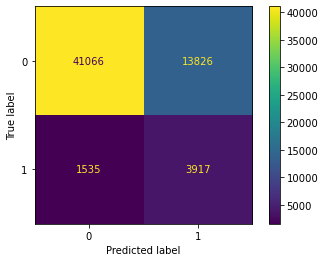

In [213]:
plot_confusion_matrix(gnb2, xtest, ytest)

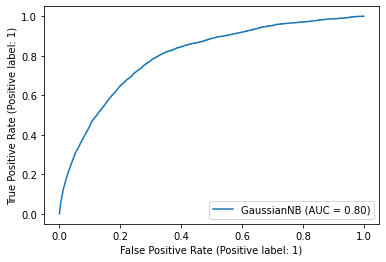

In [214]:
plot_roc_curve(gnb2, xtest, ytest)

## Result: Naive Bayes after SMOTE yields lower False Negatives (hence a better recall_score) which is a better result

## 7) Random Forest Classifier

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
rf = RandomForestClassifier(n_estimators=80,oob_score=True,random_state=40) 

In [217]:
rf.fit(xtrain_smote,ytrain_smote)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=40)

In [218]:
rf.oob_score_


0.9163797343826857

In [219]:
#Parameter tuning
ls=[]
for w in range(20,300,10):
    clf=RandomForestClassifier(oob_score=True,n_estimators=w,random_state=400)
    clf.fit(xtrain_smote,ytrain_smote)
    oob=clf.oob_score_
    print('For n_estimators = ', w)
    print('OOB score is ', oob)
    print('************************')
    ls.append((oob,w))

For n_estimators =  20
OOB score is  0.9076761217685959
************************
For n_estimators =  30
OOB score is  0.9119869377493578
************************
For n_estimators =  40
OOB score is  0.9138679382776775
************************
For n_estimators =  50
OOB score is  0.915120420469658
************************
For n_estimators =  60
OOB score is  0.9156897305569219
************************
For n_estimators =  70
OOB score is  0.9161633965495254
************************
For n_estimators =  80
OOB score is  0.916311417172214
************************
For n_estimators =  90
OOB score is  0.9164389426317612
************************
For n_estimators =  100
OOB score is  0.9167463700788836
************************
For n_estimators =  110
OOB score is  0.9170014209979778
************************
For n_estimators =  120
OOB score is  0.9171608278224117
************************
For n_estimators =  130
OOB score is  0.9170401340839117
************************
For n_estimators =  140
OO

In [220]:
print(max(ls))  # To get n_estimators having Max oob_score 

(0.9177597420342133, 280)


In [221]:
clf=RandomForestClassifier(oob_score=True,n_estimators=280,random_state=40)

In [222]:
clf.fit(xtrain_smote,ytrain_smote)

RandomForestClassifier(n_estimators=280, oob_score=True, random_state=40)

In [223]:
clf.oob_score_

0.9176959793044397

In [224]:
y_pred_rf = clf.predict(xtest)


In [225]:
accuracy_score(ytest,y_pred_rf)

0.861378098899642

In [226]:
precision_score(ytest,y_pred_rf)

0.2519161982626469

In [227]:
recall_score(ytest,y_pred_rf)

0.2712765957446808

In [228]:
f1_score(ytest,y_pred_rf)


0.26123818775942764

In [229]:
print(classification_report(ytest,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     54892
           1       0.25      0.27      0.26      5452

    accuracy                           0.86     60344
   macro avg       0.59      0.60      0.59     60344
weighted avg       0.87      0.86      0.86     60344



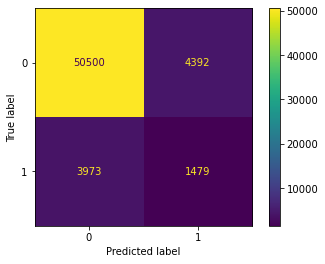

In [230]:
plot_confusion_matrix(clf, xtest, ytest)

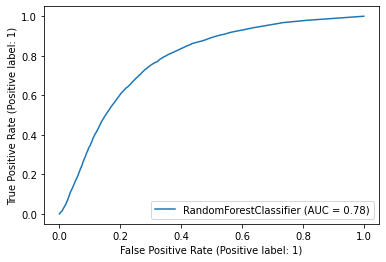

In [231]:
plot_roc_curve(clf, xtest, ytest)

In [279]:
importance_rf = clf.feature_importances_

In [283]:
feature_imp_rf = pd.DataFrame({"Variable": features, "feature_importance": importance_rf } ).round(decimals=2).sort_values("feature_importance", ascending=False).style.bar(color= ['red', 'green'], align= 'zero')

In [284]:
feature_imp_rf

,Variable,feature_importance
0,BMI,0.200000
3,SleepTime,0.110000
1,PhysicalHealth,0.100000
2,MentalHealth,0.060000
4,Smoking_Yes,0.060000
8,Sex_Male,0.060000
7,DiffWalking_Yes,0.050000
13,AgeCategory_70-79,0.040000
20,Diabetic_Yes,0.040000
14,AgeCategory_80 or older,0.030000


## Summary Table (Modelling)

In [242]:
summary = pd.DataFrame({"Model" : ["Logistic Regression (with SMOTE)","Logistic Regression (without SMOTE)", "Naive Bayes (with SMOTE)", 
                                  "Naive Bayes (without SMOTE)", "Random Forest (with SMOTE)", "KNN Classifier (with SMOTE)",
                                  "KNN Classifier (without SMOTE)"], 
                       "ROC_AUC Score": [0.84,0.84, 0.80,0.80, 0.78, 0.73,0.71], 
                       "Recall Score": [0.79, 0.11, 0.72,0.57,0.27,0.56,0.15]}, index= range(1,8))

In [243]:
summary

,Model,ROC_AUC Score,Recall Score
1,Logistic Regression (with SMOTE),0.84,0.79
2,Logistic Regression (without SMOTE),0.84,0.11
3,Naive Bayes (with SMOTE),0.80,0.72
4,Naive Bayes (without SMOTE),0.80,0.57
5,Random Forest (with SMOTE),0.78,0.27
6,KNN Classifier (with SMOTE),0.73,0.56
7,KNN Classifier (without SMOTE),0.71,0.15


## Comments

- In Heart Disease cases it's better to have a False Positive (Informing a patient falsely that he/she has disease) rather than False Negative (Informing a patient falsely that he/she does not have Heart Disease)


- In False Negative case, the patient's illness remains undetected and may prove to be dangerous in the future


- Best results are given by Logistic Regression (with SMOTE) having ROC_AUC score of 0.84 and recall score of 0.789


- Second best model is Naive Bayes (with SMOTE) having ROC_AUC score of 0.80 and recall score of 0.72


- Highest accuracy score is given by Logistic Regression (without SMOTE) of 0.91, while suffering from lowest recall score of 0.11


- Balancing the data on target variable with SMOTE helps in getting a better Recall Score


- Important parameters which affects the target variable are:

   a) BMI
   
   b) Sleep Time
   
   c) Physical Health
   
   d) Mental Health
   
   e) Smoking
   
   f) Sex
   
   g) Diff. Walking
   
   h) Age Category